In [ ]:
# pip install opendatasets --q

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import opendatasets as od
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
# od.download('https://www.kaggle.com/smaranjitghose/corn-or-maize-leaf-disease-dataset/download')

100%|██████████| 161M/161M [00:01<00:00, 144MB/s]


(585, 1000, 3)

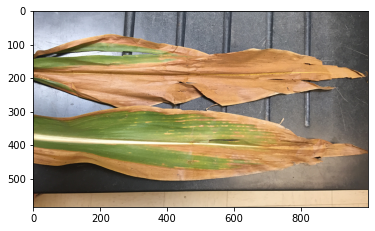

In [ ]:
img = cv2.imread('/content/drive/MyDrive/data/Blight/Corn_Blight (1).jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
img.shape

In [ ]:
def computeBTC(image, N):
  M = image.shape[0]
  step_size = int(M/N)

  x1_arr = [x for x in range (0,image.shape[0], step_size)]
  x2_arr = [x for x in range (step_size, image.shape[0]+1, step_size)]
  y1_arr = [y for y in range (0,image.shape[0], step_size)]
  y2_arr = [y for y in range (step_size, image.shape[1]+1, step_size)]
  
  feature = []
  for i in range(N):
    for j in range(N):
      block = image[x1_arr[i]: x2_arr[i], y1_arr[j]: y2_arr[j]]
      block_mean = np.mean(block)
      avg_above = int(np.mean((block[np.where(block >= block_mean)])))
      try:
        avg_below = int(np.mean((block[np.where(block < block_mean)])))
      except:
        avg_below = 0
      feature.append(avg_above)
      feature.append(avg_below)

  return feature

In [ ]:
dataFolder = '/content/drive/MyDrive/data/'
folders = os.listdir(dataFolder)
class_dir = {"Blight" : 0, "Common_Rust": 1, "Healthy": 2, "Gray_Leaf_Spot": 3}
N = 16
size = (512, 512)
features = []
for folder in folders:
  files = os.listdir(dataFolder + folder)
  for file in files:
    imagePath = dataFolder + folder + '/' + file
    print(imagePath, class_dir[folder])
    image = cv2.imread(imagePath, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, size)
    feature = computeBTC(image, N)
    features.append(feature)

features = np.asarray(features, dtype='int')
print(features.shape)

/content/drive/MyDrive/data/Blight/Corn_Blight (670).JPG 0
/content/drive/MyDrive/data/Blight/Corn_Blight (671).JPG 0
/content/drive/MyDrive/data/Blight/Corn_Blight (672).JPG 0
/content/drive/MyDrive/data/Blight/Corn_Blight (673).JPG 0
/content/drive/MyDrive/data/Blight/Corn_Blight (674).JPG 0
/content/drive/MyDrive/data/Blight/Corn_Blight (675).JPG 0
/content/drive/MyDrive/data/Blight/Corn_Blight (676).JPG 0
/content/drive/MyDrive/data/Blight/Corn_Blight (677).jpg 0
/content/drive/MyDrive/data/Blight/Corn_Blight (678).jpg 0
/content/drive/MyDrive/data/Blight/Corn_Blight (679).JPG 0
/content/drive/MyDrive/data/Blight/Corn_Blight (68).jpg 0
/content/drive/MyDrive/data/Blight/Corn_Blight (680).JPG 0
/content/drive/MyDrive/data/Blight/Corn_Blight (681).JPG 0
/content/drive/MyDrive/data/Blight/Corn_Blight (682).JPG 0
/content/drive/MyDrive/data/Blight/Corn_Blight (683).JPG 0
/content/drive/MyDrive/data/Blight/Corn_Blight (684).JPG 0
/content/drive/MyDrive/data/Blight/Corn_Blight (685).JPG 

KeyboardInterrupt: ignored

In [ ]:
import pickle

file = open("Feats.pickle","wb")
pickle.dump(features,file)
file.close()

In [ ]:
category = []
for folder in folders:
  files = os.listdir(dataFolder + folder)
  for file in files:
    imagePath = dataFolder + folder + '/' + file
    category.append(class_dir[folder])

category = np.asarray(category, dtype='int')
print(category)
category = np.reshape(category, (category.shape[0], 1))
print(category.shape)

features = np.append(features, category, axis=1)
print(features)
print(features.shape)

[2 2 2 ... 3 3 3]
(4188, 1)
[[138 116 132 ... 187 159   2]
 [167 158 170 ... 142 134   2]
 [153 135 158 ...  76  69   2]
 ...
 [120 115 111 ... 149 145   3]
 [129 113 129 ... 147 143   3]
 [ 74  64 101 ...  18  16   3]]
(4188, 513)


In [ ]:
images = []
size = (128, 128)
for folder in folders:
  files = os.listdir(dataFolder + folder)
  for file in files:
    imagePath = dataFolder + folder + '/' + file
    image = cv2.imread(imagePath, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, size)
    image = image.flatten()
    images.append(image)

images = np.asarray(images, dtype='float')

pca = PCA(n_components = 128)

pca.fit(images)
features = pca.transform(images)
print(features.shape)

(4188, 128)


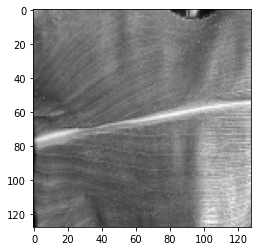

(128, 128)


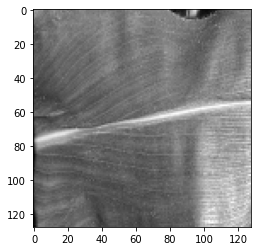

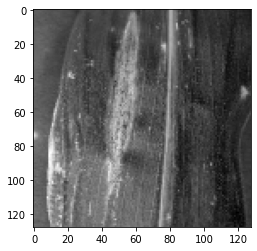

(128, 128)


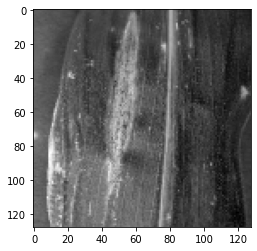

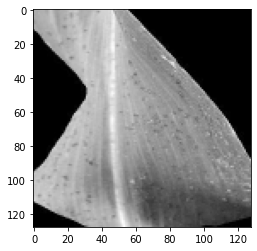

(128, 128)


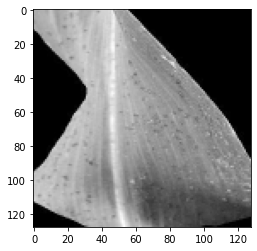

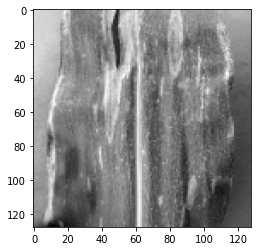

(128, 128)


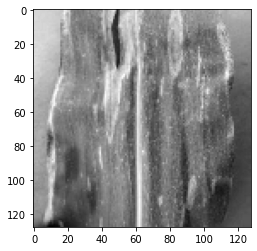

In [ ]:
import matplotlib.pyplot as plt

images = []
size = (128, 128)
for folder in folders:
  files = os.listdir(dataFolder + folder)
  for file in files:
    imagePath = dataFolder + folder + '/' + file
    image = cv2.imread(imagePath, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, size)
    plt.imshow(image, cmap='gray')
    plt.show()
    image = np.asarray(image, dtype='float')
    img = cv2.dct(image)
    print(img.shape)
    img = cv2.idct(img)
    plt.imshow(img, cmap='gray')
    plt.show()
    break

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
  
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)